
!!! train ffns !!!

xtrain shape: (18211, 92)
18211 train samples
7806 test samples
FFN3: Done
FFN5: Done
FFN10: Done

!!! train cnns !!!

xtrain shape: (18211, 4, 23, 1)
18211 train samples
7806 test samples
CNN3: Done
CNN5: Done
CNN10: Done
CNN Lin: Done

!!! train random forest !!!

xtrain shape: (18211, 92)
18211 train samples
7806 test samples
RF Training: Done

!!!! roc curve on crispor data !!!


!!!! precision recall curve on crispor data !!!

<function brierScore at 0x7f40c6b9bf28>
FNN 3: 0.004
FNN 5: 0.004
FNN 10: 0.004
CNN 3: 0.005
CNN 5: 0.005
CNN 10: 0.005
CNN Linn et al.: 0.216
RF: 0.004
<function accuracy_score at 0x7f40fa3ba7b8>
FNN 3: 0.995
FNN 5: 0.995
FNN 10: 0.994
CNN 3: 0.995
CNN 5: 0.995
CNN 10: 0.994
CNN Linn et al.: 0.994
RF: 0.995
<function f1_score at 0x7f40fa3babf8>
FNN 3: 0.245
FNN 5: 0.455
FNN 10: 0.0
CNN 3: 0.204
CNN 5: 0.196
CNN 10: 0.0
CNN Linn et al.: 0.0
RF: 0.327
<function precision_score at 0x7f40fa3baf28>
FNN 3: 1.0
FNN 5: 0.652
FNN 10: 0.0
CNN 3: 

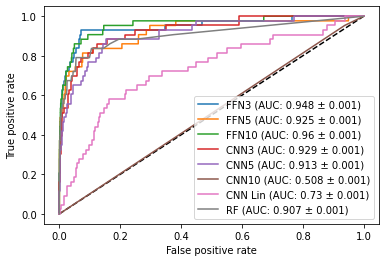

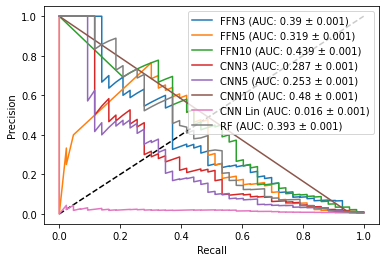

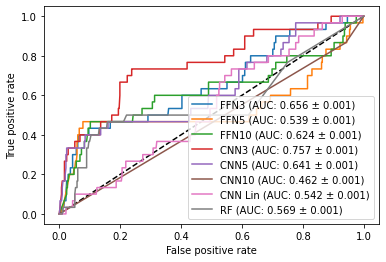

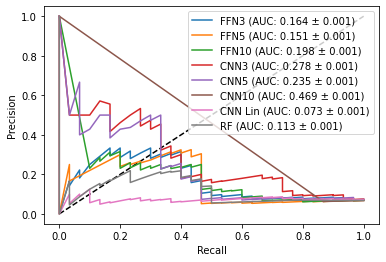

In [1]:
# -*- coding: utf-8 -*-
"""Perform the Experiments for Off-Target Predictions.
===============================================
Version |    Date     |   Author    |   Comment
-----------------------------------------------
0.0     | 25 Oct 2020 | J. Charlier | initial version
0.1     | 09 Nov 2020 | J. Charlier | update new version
0.2     | 11 Nov 2020 | J. Charlier | bug fix for 8x23 encoding
0.3     | 12 Nov 2020 | J. Charlier | bug fix for 8x23 encoding
0.4     | 13 Nov 2020 | J. Charlier | bug fix for 8x23 encoding
===============================================
"""
#
#
from __future__ import print_function
import os
import time
import random
random.seed(42)
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import (classification_report, roc_auc_score,
                             confusion_matrix, f1_score,
                             roc_curve, precision_score, recall_score,
                             auc, average_precision_score, 
                             precision_recall_curve, accuracy_score)
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
import tensorflow as tf
import tensorflow.python.keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import (Conv2D, MaxPooling2D, MaxPool2D,
                                            concatenate, BatchNormalization, 
                                            Dense, Dropout, Flatten, Input)
from tensorflow.python.keras.preprocessing.image import (ImageDataGenerator,
                                       img_to_array, 
                                       array_to_img)
import tensorflow.python.keras as tfkeras
from tensorflow.python.keras import backend as K
from tensorflow.python.keras import (models, layers)
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
#
import utilities
import ffns
import cnns
import mltrees
p = print
#
#
# Incorporating reduced learning and early stopping for NN callback
reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, 
    patience=8, verbose=1, 
    mode='auto', min_delta=0.02, 
    cooldown=0, min_lr=0)
eary_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.0001,
    patience=20, verbose=1, mode='auto')
callbacks = [reduce_learning, eary_stopping]
#
#
ismodelsaved = True   
#
#
# data read
# -*-*-*-*-
imgrows = 4
nexp = 3
imgcols = 23
num_classes = 2
epochs = 500
batch_size = 64
undersampling = False
#
# we import the pkl file containing the data
flpath = ''
loaddata = utilities.importData(
    flpath=flpath,
    encoding=str(imgrows) + 'x' + str(imgcols),
    sim='crispor',
    tl=False 
)
#
# the data, split between train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    loaddata.images,
    pd.Series(loaddata.target), #loaddata.target,
    test_size=0.3,
    shuffle=True, 
    random_state=42
)
#
#
p('\n!!! train ffns !!!\n')
xtrainffn, xtestffn, ytrainfnn, ytestffn, inputshapeffn = ffns.transformImages(
    x_train, x_test,
    y_train, y_test,
    imgrows, imgcols,
    num_classes
)
ffn3 = ffns.ffnthree(
    xtrainffn, ytrainfnn,
    xtestffn, ytestffn,
    inputshapeffn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved
)
ffn5 = ffns.ffnfive(
    xtrainffn, ytrainfnn,
    xtestffn, ytestffn,
    inputshapeffn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved
)
ffn10 = ffns.ffnten(
    xtrainffn, ytrainfnn,
    xtestffn, ytestffn,
    inputshapeffn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved
)
#
p('\n!!! train cnns !!!\n')
xtraincnn, xtestcnn, ytraincnn, ytestcnn, inputshapecnn = cnns.transformImages(
    x_train, x_test,
    y_train, y_test,
    imgrows, imgcols,
    num_classes
)
cnn3 = cnns.cnnthree(
    xtraincnn, ytraincnn,
    xtestcnn, ytestcnn,
    inputshapecnn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved
)
cnn5 = cnns.cnnfive(
    xtraincnn, ytraincnn,
    xtestcnn, ytestcnn,
    inputshapecnn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved
)
cnn10 = cnns.cnnten(
    xtraincnn, ytraincnn,
    xtestcnn, ytestcnn,
    inputshapecnn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved
)
cnnlin = cnns.cnnlin(
    xtraincnn, ytraincnn,
    xtestcnn, ytestcnn,
    inputshapecnn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved
) 
#
p('\n!!! train random forest !!!\n')
xtrainrf, xtestrf, ytrainrf, ytestrf = mltrees.transformImages(
    x_train, x_test,
    y_train, y_test,
    imgrows, imgcols
)
rf = mltrees.initFitRF(xtrainrf, ytrainrf)
#
#
p('\n!!!! roc curve on crispor data !!!\n')
utilities.plotRocCurve(
    [
        ffn3, ffn5,
        ffn10, cnn3,
        cnn5, cnn10, cnnlin, rf
    ],
    [
        'FFN3', 'FFN5',
        'FFN10', 'CNN3',
        'CNN5', 'CNN10', 'CNN Lin', 'RF'
    ],
    [
        xtestffn, xtestffn,
        xtestffn, xtestcnn,
        xtestcnn, xtestcnn, xtestcnn, xtestrf
    ],
    [
        ytestffn, ytestffn,
        ytestffn, ytestcnn,
        ytestcnn, ytestcnn, ytestcnn, y_test
    ],
    'roccurvecrispr4x23.pdf'
)
p('\n!!!! precision recall curve on crispor data !!!\n')
utilities.plotPrecisionRecallCurve(
    [
        ffn3, ffn5,
        ffn10, cnn3,
        cnn5, cnn10, cnnlin, rf
    ],
    [
        'FFN3', 'FFN5',
        'FFN10', 'CNN3',
        'CNN5', 'CNN10',
        'CNN Lin', 'RF'
    ],
    [
        xtestffn, xtestffn,
        xtestffn, xtestcnn,
        xtestcnn, xtestcnn,
        xtestcnn, xtestrf
    ],
    [
        ytestffn, ytestffn,
        ytestffn, ytestcnn,
        ytestcnn, ytestcnn,
        ytestcnn, y_test
    ],
    'precisionrecallcurvecrispr4x23.pdf'
)
#
#
preds = utilities.collectPreds(
    [
        ffn3, ffn5,
        ffn10, cnn3,
        cnn5, cnn10,
        cnnlin, rf
    ],
    [
        xtestffn, xtestffn,
        xtestffn, xtestcnn,
        xtestcnn, xtestcnn,
        xtestcnn, xtestrf
    ]
)
# correct predictions of Linn et al.
preds.yscore[-2][:, 1] = np.abs(preds.yscore[-2][:, 1])
for n in range(len(preds.yscore[-2])):
    under = preds.yscore[-2][n, 0] + preds.yscore[-2][n, 1]
    preds.yscore[-2][n, 0] = preds.yscore[-2][n, 0] / (under)
    preds.yscore[-2][n, 1] = preds.yscore[-2][n, 1] / (under)
#
for objfun in [utilities.brierScore, accuracy_score, f1_score, precision_score, recall_score]:
    if 'brier' in str(objfun):
        utilities.computeScore(objfun, y_test, preds.yscore)
    else:
        utilities.computeScore(objfun, y_test, preds.ypred)
#
utilities.printTopPreds(
    cnn3,
    xtestcnn,
    y_test,
    loaddata.target_names,
    imgrows
)
#
p('\n\n')
p('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
p('!!!       PREDICTIONS ON GUIDE SEQ           !!!')
p('!!!       RESULTS FOR PUBLICATION            !!!')
p('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
#
loadguideseq = utilities.importData(
    flpath=flpath,
    encoding=str(imgrows)+'x'+str(imgcols),
    sim='guideseq',
    tl=False
)
gseq = utilities.transformGuideSeqImages(
		loadguideseq,
		num_classes,
		imgrows, imgcols
)
p('\n!!!! roc curve on guideseq data !!!\n')
utilities.plotRocCurve(
    [
        ffn3, ffn5,
        ffn10, cnn3,
        cnn5, cnn10, cnnlin, rf
    ],
    [
        'FFN3', 'FFN5',
        'FFN10', 'CNN3',
        'CNN5', 'CNN10', 'CNN Lin', 'RF'
    ],
    [
        gseq.xgseqffn, gseq.xgseqffn,
        gseq.xgseqffn, gseq.xgseqcnn,
        gseq.xgseqcnn, gseq.xgseqcnn,
        gseq.xgseqcnn, gseq.xgseqrf
    ],
    [
        gseq.ygseqffn, gseq.ygseqffn,
        gseq.ygseqffn, gseq.ygseqcnn,
        gseq.ygseqcnn, gseq.ygseqcnn,
        gseq.ygseqcnn, gseq.ygseqrf
    ],
    'roccurveguideseq4x23.pdf'
)
p('\n!!!! precision recall curve on guideseq data !!!\n')
utilities.plotPrecisionRecallCurve(
    [
        ffn3, ffn5,
        ffn10, cnn3,
        cnn5, cnn10, cnnlin, rf
    ],
    [
        'FFN3', 'FFN5',
        'FFN10', 'CNN3',
        'CNN5', 'CNN10', 'CNN Lin', 'RF'
    ],
    [
        gseq.xgseqffn, gseq.xgseqffn,
        gseq.xgseqffn, gseq.xgseqcnn,
        gseq.xgseqcnn, gseq.xgseqcnn,
        gseq.xgseqcnn, gseq.xgseqrf
    ],
    [
        gseq.ygseqffn, gseq.ygseqffn,
        gseq.ygseqffn, gseq.ygseqcnn,
        gseq.ygseqcnn, gseq.ygseqcnn,
        gseq.ygseqcnn, gseq.ygseqrf
    ],
    'precisionrecallcurveguideseq4x23.pdf'
)
predsgseq = utilities.collectPreds(
    [
        ffn3, ffn5,
        ffn10, cnn3,
        cnn5, cnn10,
        cnnlin, rf
    ],
    [
        gseq.xgseqffn, gseq.xgseqffn,
        gseq.xgseqffn, gseq.xgseqcnn,
        gseq.xgseqcnn, gseq.xgseqcnn,
        gseq.xgseqcnn, gseq.xgseqrf
    ]
)
# correct predictions of Linn et al.
predsgseq.yscore[-2][:, 1] = np.abs(predsgseq.yscore[-2][:, 1])
for n in range(len(predsgseq.yscore[-2])):
    under = predsgseq.yscore[-2][n, 0] + predsgseq.yscore[-2][n, 1]
    predsgseq.yscore[-2][n, 0] = predsgseq.yscore[-2][n, 0] / (under)
    predsgseq.yscore[-2][n, 1] = predsgseq.yscore[-2][n, 1] / (under)
#
for objfun in [utilities.brierScore, accuracy_score, f1_score, precision_score, recall_score]:
    if 'brier' in str(objfun):
        utilities.computeScore(objfun, loadguideseq.target, predsgseq.yscore)
    else:
        utilities.computeScore(objfun, loadguideseq.target, predsgseq.ypred)
#
utilities.printTopPreds(
    cnn3,
    xtestcnn,
    gseq.ygseqdf,
    loadguideseq.target_names,
    imgrows
)
#
# Last card of module offtargetmodelsexperiments4x23.
#


!!! train ffns !!!

xtrain shape: (18211, 184)
18211 train samples
7806 test samples
FFN3: Done
FFN5: Done
FFN10: Done

!!! train cnns !!!

xtrain shape: (18211, 8, 23, 1)
18211 train samples
7806 test samples
CNN3: Done
CNN5: Done
CNN10: Done
CNN Lin: Done

!!! train random forest !!!

xtrain shape: (18211, 184)
18211 train samples
7806 test samples
RF Training: Done

!!!! roc curve on crispor data !!!


!!!! precision recall curve on crispor data !!!

<function brierScore at 0x7f40c6b9bf28>
FNN 3: 0.001
FNN 5: 0.001
FNN 10: 0.001
CNN 3: 0.004
CNN 5: 0.003
CNN 10: 0.005
CNN Linn et al.: 0.367
RF: 0.001
<function accuracy_score at 0x7f40fa3ba7b8>
FNN 3: 0.999
FNN 5: 0.999
FNN 10: 0.999
CNN 3: 0.995
CNN 5: 0.997
CNN 10: 0.994
CNN Linn et al.: 0.994
RF: 0.998
<function f1_score at 0x7f40fa3babf8>
FNN 3: 0.883
FNN 5: 0.925
FNN 10: 0.938
CNN 3: 0.208
CNN 5: 0.613
CNN 10: 0.0
CNN Linn et al.: 0.0
RF: 0.838
<function precision_score at 0x7f40fa3baf28>
FNN 3: 1.0
FNN 5: 1.0
FNN 10: 1.0
CNN 3

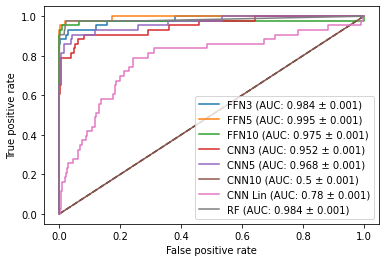

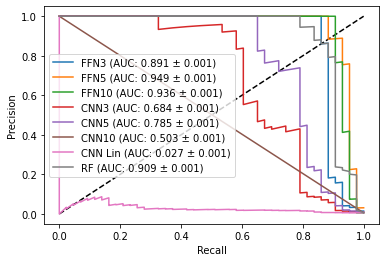

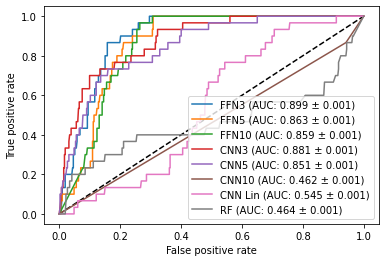

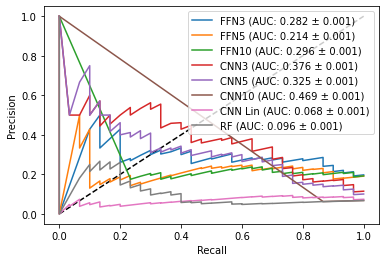

In [2]:
# -*- coding: utf-8 -*-
"""Perform the Experiments for Off-Target Predictions.
===============================================
Version |    Date     |   Author    |   Comment
-----------------------------------------------
0.0     | 25 Oct 2020 | J. Charlier | initial version
0.1     | 09 Oct 2020 | J. Charlier | update new version
0.2     | 11 Oct 2020 | J. Charlier | bug fix for 8x23 encoding
0.3     | 12 Oct 2020 | J. Charlier | bug fix for 8x23 encoding
===============================================
"""
#
#
from __future__ import print_function
import os
import time
import random
random.seed(42)
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import (classification_report, roc_auc_score,
                             confusion_matrix, f1_score,
                             roc_curve, precision_score, recall_score,
                             auc, average_precision_score, 
                             precision_recall_curve, accuracy_score)
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
import tensorflow as tf
import tensorflow.python.keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import (Conv2D, MaxPooling2D, MaxPool2D,
                                            concatenate, BatchNormalization, 
                                            Dense, Dropout, Flatten, Input)
from tensorflow.python.keras.preprocessing.image import (ImageDataGenerator,
                                       img_to_array, 
                                       array_to_img)
import tensorflow.python.keras as tfkeras
from tensorflow.python.keras import backend as K
from tensorflow.python.keras import (models, layers)
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
#
import utilities
import ffns
import cnns
import mltrees
p = print
#
#
# Incorporating reduced learning and early stopping for NN callback
reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, 
    patience=8, verbose=1, 
    mode='auto', min_delta=0.02, 
    cooldown=0, min_lr=0)
eary_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.0001,
    patience=20, verbose=1, mode='auto')
callbacks = [reduce_learning, eary_stopping]
#
#
ismodelsaved = True   
#
#
# data read
# -*-*-*-*-
imgrows = 8
nexp = 3
imgcols = 23
num_classes = 2
epochs = 500
batch_size = 64
undersampling = False
#
# we import the pkl file containing the data
flpath = ''
loaddata = utilities.importData(
    flpath=flpath,
    encoding=str(imgrows) + 'x' + str(imgcols),
    sim='crispor',
    tl=False 
)
#
# the data, split between train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    loaddata.images,
    pd.Series(loaddata.target), #loaddata.target,
    test_size=0.3,
    shuffle=True, 
    random_state=42
)
#
#
p('\n!!! train ffns !!!\n')
xtrainffn, xtestffn, ytrainfnn, ytestffn, inputshapeffn = ffns.transformImages(
    x_train, x_test,
    y_train, y_test,
    imgrows, imgcols,
    num_classes
)
ffn3 = ffns.ffnthree(
    xtrainffn, ytrainfnn,
    xtestffn, ytestffn,
    inputshapeffn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved
)
ffn5 = ffns.ffnfive(
    xtrainffn, ytrainfnn,
    xtestffn, ytestffn,
    inputshapeffn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved
)
ffn10 = ffns.ffnten(
    xtrainffn, ytrainfnn,
    xtestffn, ytestffn,
    inputshapeffn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved
)
#
p('\n!!! train cnns !!!\n')
xtraincnn, xtestcnn, ytraincnn, ytestcnn, inputshapecnn = cnns.transformImages(
    x_train, x_test,
    y_train, y_test,
    imgrows, imgcols,
    num_classes
)
cnn3 = cnns.cnnthree(
    xtraincnn, ytraincnn,
    xtestcnn, ytestcnn,
    inputshapecnn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved
)
cnn5 = cnns.cnnfive(
    xtraincnn, ytraincnn,
    xtestcnn, ytestcnn,
    inputshapecnn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved
)
cnn10 = cnns.cnnten(
    xtraincnn, ytraincnn,
    xtestcnn, ytestcnn,
    inputshapecnn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved
)
cnnlin = cnns.cnnlin(
    xtraincnn, ytraincnn,
    xtestcnn, ytestcnn,
    inputshapecnn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved
) 
#
p('\n!!! train random forest !!!\n')
xtrainrf, xtestrf, ytrainrf, ytestrf = mltrees.transformImages(
    x_train, x_test,
    y_train, y_test,
    imgrows, imgcols
)
rf = mltrees.initFitRF(xtrainrf, ytrainrf)
#
#
p('\n!!!! roc curve on crispor data !!!\n')
utilities.plotRocCurve(
    [
        ffn3, ffn5,
        ffn10, cnn3,
        cnn5, cnn10, cnnlin, rf
    ],
    [
        'FFN3', 'FFN5',
        'FFN10', 'CNN3',
        'CNN5', 'CNN10', 'CNN Lin', 'RF'
    ],
    [
        xtestffn, xtestffn,
        xtestffn, xtestcnn,
        xtestcnn, xtestcnn, xtestcnn, xtestrf
    ],
    [
        ytestffn, ytestffn,
        ytestffn, ytestcnn,
        ytestcnn, ytestcnn, ytestcnn, y_test
    ],
    'roccurvecrispr8x23.pdf'
)
p('\n!!!! precision recall curve on crispor data !!!\n')
utilities.plotPrecisionRecallCurve(
    [
        ffn3, ffn5,
        ffn10, cnn3,
        cnn5, cnn10, cnnlin, rf
    ],
    [
        'FFN3', 'FFN5',
        'FFN10', 'CNN3',
        'CNN5', 'CNN10',
        'CNN Lin', 'RF'
    ],
    [
        xtestffn, xtestffn,
        xtestffn, xtestcnn,
        xtestcnn, xtestcnn,
        xtestcnn, xtestrf
    ],
    [
        ytestffn, ytestffn,
        ytestffn, ytestcnn,
        ytestcnn, ytestcnn,
        ytestcnn, y_test
    ],
    'precisionrecallcurvecrispr8x23.pdf'
)
#
#
preds = utilities.collectPreds(
    [
        ffn3, ffn5,
        ffn10, cnn3,
        cnn5, cnn10,
        cnnlin, rf
    ],
    [
        xtestffn, xtestffn,
        xtestffn, xtestcnn,
        xtestcnn, xtestcnn,
        xtestcnn, xtestrf
    ]
)
# correct predictions of Linn et al.
preds.yscore[-2][:, 1] = np.abs(preds.yscore[-2][:, 1])
for n in range(len(preds.yscore[-2])):
    under = preds.yscore[-2][n, 0] + preds.yscore[-2][n, 1]
    preds.yscore[-2][n, 0] = preds.yscore[-2][n, 0] / (under)
    preds.yscore[-2][n, 1] = preds.yscore[-2][n, 1] / (under)
#
for objfun in [utilities.brierScore, accuracy_score, f1_score, precision_score, recall_score]:
    if 'brier' in str(objfun):
        utilities.computeScore(objfun, y_test, preds.yscore)
    else:
        utilities.computeScore(objfun, y_test, preds.ypred)
#
utilities.printTopPreds(
    cnn3,
    xtestcnn,
    y_test,
    loaddata.target_names,
    imgrows
)
#
p('\n\n')
p('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
p('!!!       PREDICTIONS ON GUIDE SEQ           !!!')
p('!!!       RESULTS FOR PUBLICATION            !!!')
p('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
#
p('\n!!! reload dl for transfer learning !!!\n')
ffn3 = ffns.ffnthree(
    xtrainffn, ytrainfnn,
    xtestffn, ytestffn,
    inputshapeffn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved,
    tl=True
)
ffn5 = ffns.ffnfive(
    xtrainffn, ytrainfnn,
    xtestffn, ytestffn,
    inputshapeffn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved,
    tl=True
)
ffn10 = ffns.ffnten(
    xtrainffn, ytrainfnn,
    xtestffn, ytestffn,
    inputshapeffn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved,
    tl=True
)
#
cnn3 = cnns.cnnthree(
    xtraincnn, ytraincnn,
    xtestcnn, ytestcnn,
    inputshapecnn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved,
    tl=True
)
cnn5 = cnns.cnnfive(
    xtraincnn, ytraincnn,
    xtestcnn, ytestcnn,
    inputshapecnn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved,
    tl=True
)
cnn10 = cnns.cnnten(
    xtraincnn, ytraincnn,
    xtestcnn, ytestcnn,
    inputshapecnn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved,
    tl=True
)
cnnlin = cnns.cnnlin(
    xtraincnn, ytraincnn,
    xtestcnn, ytestcnn,
    inputshapecnn, num_classes,
    batch_size, epochs,
    callbacks,
    ismodelsaved=ismodelsaved,
    tl=True
) 
#
loadguideseq = utilities.importData(
    flpath=flpath,
    encoding=str(imgrows) + 'x' + str(imgcols),
    sim='guideseq',
    tl=False
)
gseq = utilities.transformGuideSeqImages(
		loadguideseq,
		num_classes,
		imgrows, imgcols
)
p('\n!!!! roc curve on guideseq data !!!\n')
utilities.plotRocCurve(
    [
        ffn3, ffn5,
        ffn10, cnn3,
        cnn5, cnn10, cnnlin, rf
    ],
    [
        'FFN3', 'FFN5',
        'FFN10', 'CNN3',
        'CNN5', 'CNN10', 'CNN Lin', 'RF'
    ],
    [
        gseq.xgseqffn, gseq.xgseqffn,
        gseq.xgseqffn, gseq.xgseqcnn,
        gseq.xgseqcnn, gseq.xgseqcnn,
        gseq.xgseqcnn, gseq.xgseqrf
    ],
    [
        gseq.ygseqffn, gseq.ygseqffn,
        gseq.ygseqffn, gseq.ygseqcnn,
        gseq.ygseqcnn, gseq.ygseqcnn,
        gseq.ygseqcnn, gseq.ygseqrf
    ],
    'roccurveguideseq8x23.pdf'
)
p('\n!!!! precision recall curve on guideseq data !!!\n')
utilities.plotPrecisionRecallCurve(
    [
        ffn3, ffn5,
        ffn10, cnn3,
        cnn5, cnn10, cnnlin, rf
    ],
    [
        'FFN3', 'FFN5',
        'FFN10', 'CNN3',
        'CNN5', 'CNN10', 'CNN Lin', 'RF'
    ],
    [
        gseq.xgseqffn, gseq.xgseqffn,
        gseq.xgseqffn, gseq.xgseqcnn,
        gseq.xgseqcnn, gseq.xgseqcnn,
        gseq.xgseqcnn, gseq.xgseqrf
    ],
    [
        gseq.ygseqffn, gseq.ygseqffn,
        gseq.ygseqffn, gseq.ygseqcnn,
        gseq.ygseqcnn, gseq.ygseqcnn,
        gseq.ygseqcnn, gseq.ygseqrf
    ],
    'precisionrecallcurveguideseq8x23.pdf'
)
predsgseq = utilities.collectPreds(
    [
        ffn3, ffn5,
        ffn10, cnn3,
        cnn5, cnn10,
        cnnlin, rf
    ],
    [
        gseq.xgseqffn, gseq.xgseqffn,
        gseq.xgseqffn, gseq.xgseqcnn,
        gseq.xgseqcnn, gseq.xgseqcnn,
        gseq.xgseqcnn, gseq.xgseqrf
    ]
)
# correct predictions of Linn et al.
predsgseq.yscore[-2][:, 1] = np.abs(predsgseq.yscore[-2][:, 1])
for n in range(len(predsgseq.yscore[-2])):
    under = predsgseq.yscore[-2][n, 0] + predsgseq.yscore[-2][n, 1]
    predsgseq.yscore[-2][n, 0] = predsgseq.yscore[-2][n, 0] / (under)
    predsgseq.yscore[-2][n, 1] = predsgseq.yscore[-2][n, 1] / (under)
#
for objfun in [utilities.brierScore, accuracy_score, f1_score, precision_score, recall_score]:
    if 'brier' in str(objfun):
        utilities.computeScore(objfun, loadguideseq.target, predsgseq.yscore)
    else:
        utilities.computeScore(objfun, loadguideseq.target, predsgseq.ypred)
#
utilities.printTopPreds(
    cnn3,
    xtestcnn,
    gseq.ygseqdf,
    loadguideseq.target_names,
    imgrows
)
#
# Last card of module offtargetmodelsexperiments8x23.
#